In [ ]:
import pandas as pd
import numpy as np
import sys
import sklearn

In [ ]:
#1. LOADING THE DATASET
# attach the column names to the dataset
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/NSL-KDD dataset/KDDTrain+_2.csv", header=None, names = col_names)
df_test = pd.read_csv("/content/drive/MyDrive/NSL-KDD dataset/KDDTest+_2.csv", header=None, names = col_names)

In [ ]:
print('Dimensions of the Training set:',df.shape)
print('Dimensions of the Test set:',df_test.shape)

Dimensions of the Training set: (125973, 42)
Dimensions of the Test set: (22544, 42)


In [ ]:
#LABEL DISTRIBUTION OF TRAINING AND TEST DATASET
print('Label distribution Training set:')
print(df['label'].value_counts())
print()
print('Label distribution Test set:')
print(df_test['label'].value_counts())

Label distribution Training set:
label
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

Label distribution Test set:
label
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattac

In [ ]:
# prompt: draw a pie chart to displayy the attacks vs normal in train set

# Calculate the counts of 'normal' and 'attack' labels
normal_count = (newlabeldf == 0).sum()
attack_count = (newlabeldf != 0).sum()

# Create the pie chart
labels = ['Normal', 'Attack']
sizes = [normal_count, attack_count]
colors = ['lightblue', 'lightcoral']  # Customize colors as needed
explode = (0.1, 0)  # Explode the 'Normal' slice

plt.figure(figsize=(6, 6))  # Adjust figure size as needed
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Attack vs. Normal (Train Set)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

NameError: name 'newlabeldf' is not defined

In [ ]:
#2. DATA PREPROCESSING
#Identify Categorical Features
print('Training set:')
for col_name in df.columns:
    if df[col_name].dtypes == 'object' :
         unique_cat = len(df[col_name].unique())
         print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))


print()
print('Distribution of categories in service:')
print(df['service'].value_counts().sort_values(ascending=False).head())

Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'label' has 23 categories

Distribution of categories in service:
service
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
Name: count, dtype: int64


In [ ]:
# Test set
print('Test set:')
for col_name in df_test.columns:
     if df_test[col_name].dtypes == 'object' :
         unique_cat = len(df_test[col_name].unique())
         print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

Test set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 64 categories
Feature 'flag' has 11 categories
Feature 'label' has 38 categories


In [ ]:
#3. LABEL ENCODER
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
categorical_columns=['protocol_type', 'service', 'flag']
# insert code to get a list of categorical columns into a variable, categorical_columns
categorical_columns=['protocol_type', 'service', 'flag']
 # Get the categorical values into a 2D numpy array
df_categorical_values = df[categorical_columns]
testdf_categorical_values = df_test[categorical_columns]
df_categorical_values.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


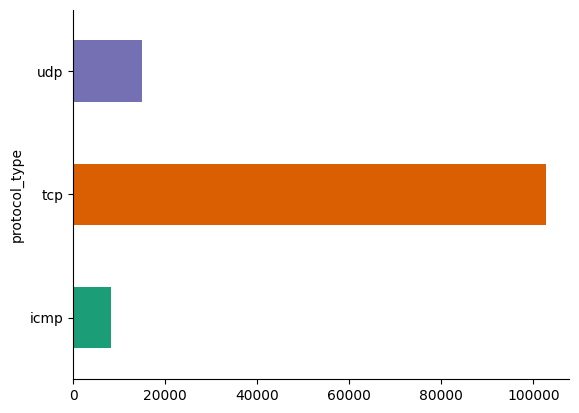

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Assign the DataFrame 'df' to '_df_0'
_df_0 = df

_df_0.groupby('protocol_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

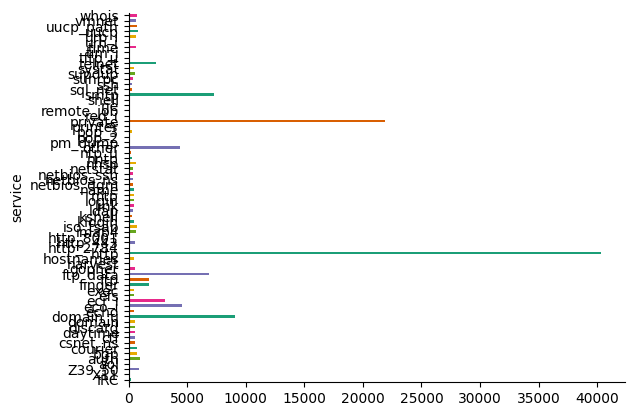

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Use the DataFrame 'df' instead of '_df_1'
df.groupby('service').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

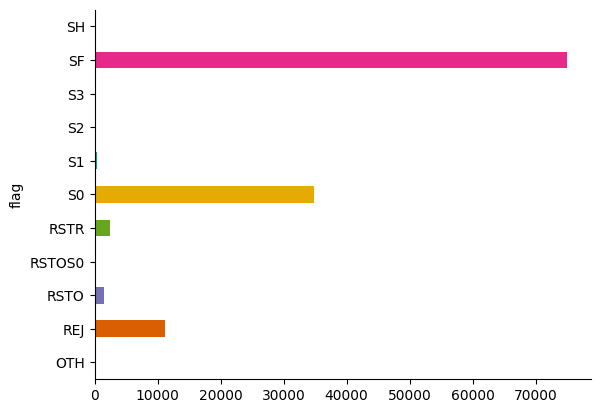

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Assuming 'df' contains the data you want to plot
df.groupby('flag').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

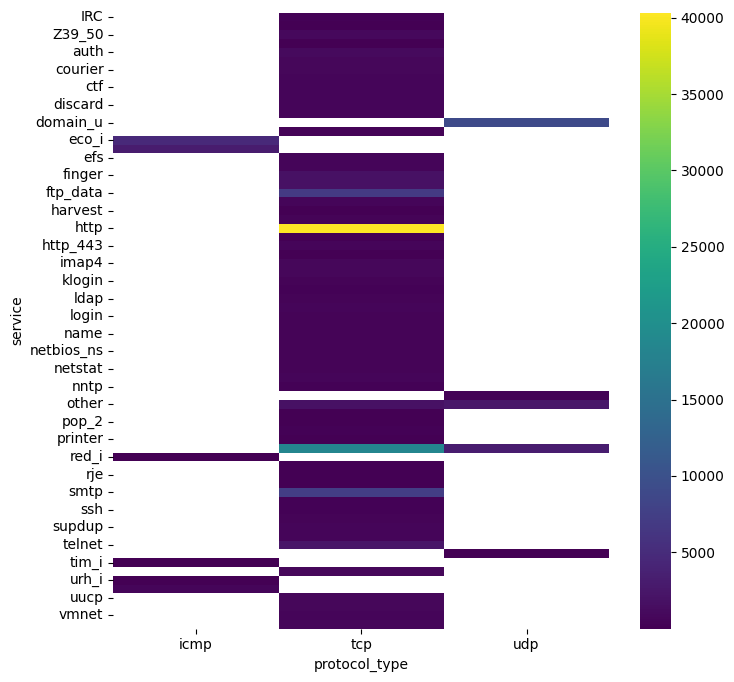

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['service'].value_counts()
    for x_label, grp in df.groupby('protocol_type') # Changed _df_3 to df
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('protocol_type')
_ = plt.ylabel('service')

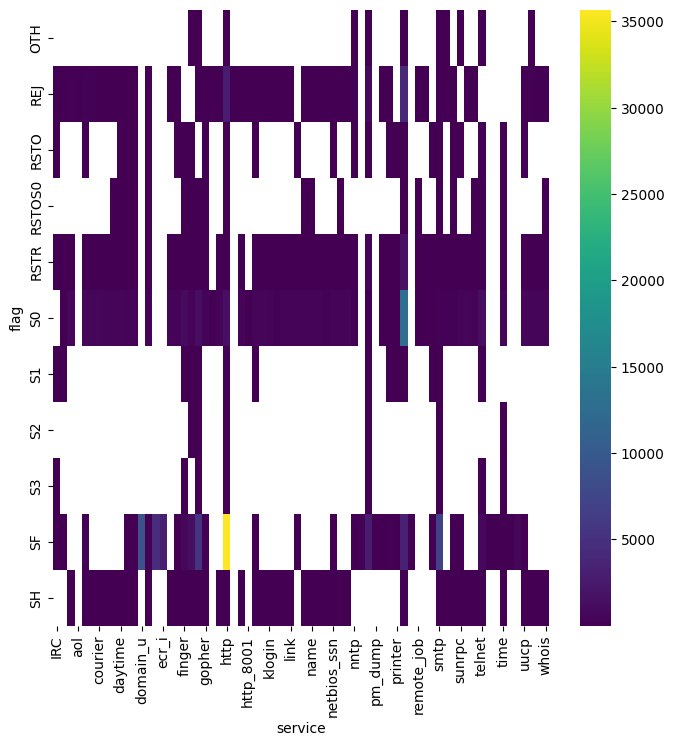

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['flag'].value_counts()
    for x_label, grp in df.groupby('service') # Changed '_df_4' to 'df'
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('service')
_ = plt.ylabel('flag')

In [ ]:
#Make column names for dummies
unique_protocol=sorted(df.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2=[string1 + x for x in unique_protocol]
# service
unique_service=sorted(df.service.unique())
string2 = 'service_'
unique_service2=[string2 + x for x in unique_service]
# flag
unique_flag=sorted(df.flag.unique())
string3 = 'flag_'
unique_flag2=[string3 + x for x in unique_flag]
# put together
dumcols=unique_protocol2 + unique_service2 + unique_flag2

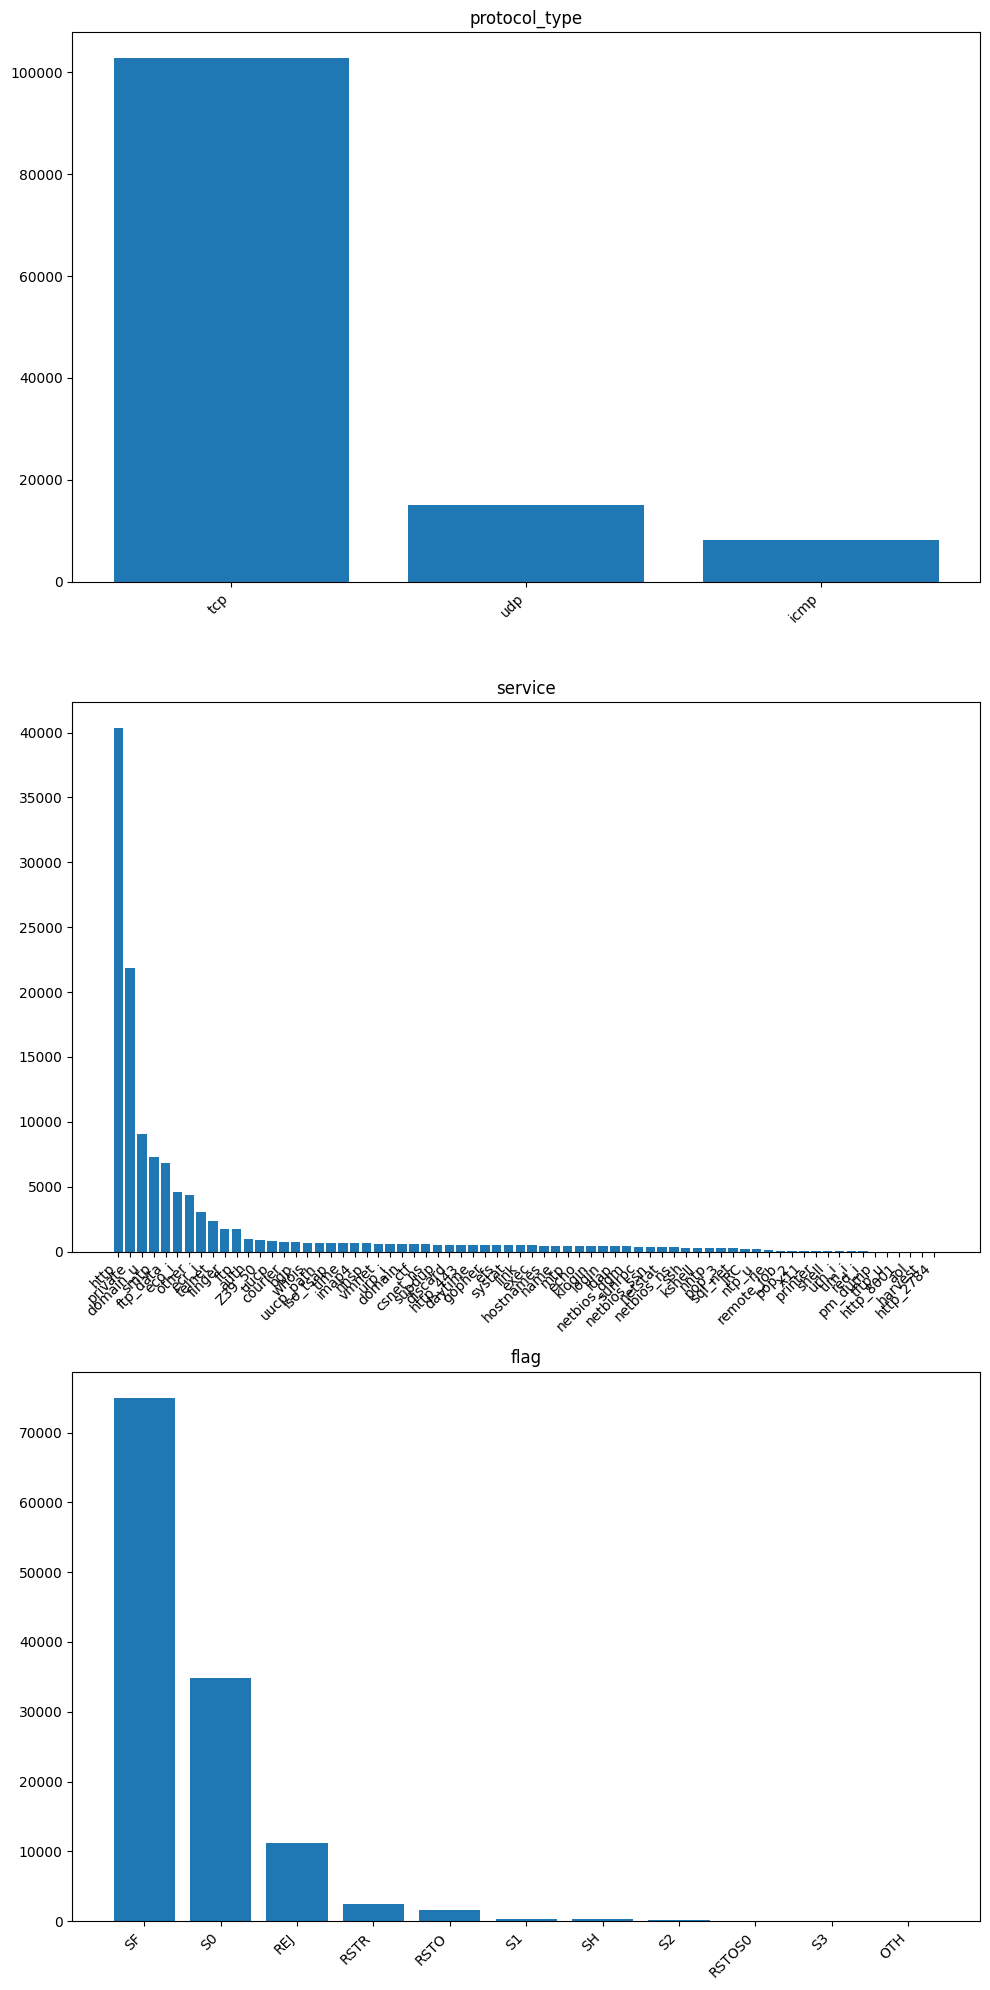

In [ ]:
import matplotlib.pyplot as plt

string1_counts = df['protocol_type'].value_counts()
string2_counts = df['service'].value_counts()
string3_counts = df['flag'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 20))

plt.subplot(3, 1, 1)
plt.bar(string1_counts.index, string1_counts.values)
plt.title('protocol_type')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

plt.subplot(3, 1, 2)
plt.bar(string2_counts.index, string2_counts.values)
plt.title('service')
plt.xticks(rotation=45, ha='right')

plt.subplot(3, 1, 3)
plt.bar(string3_counts.index, string3_counts.values)
plt.title('flag')
plt.xticks(rotation=45, ha='right')


plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()

In [ ]:
#doing same for test set
unique_service_test=sorted(df_test.service.unique())
unique_service2_test=[string2 + x for x in unique_service_test]
testdumcols=unique_protocol2 + unique_service2_test + unique_flag2

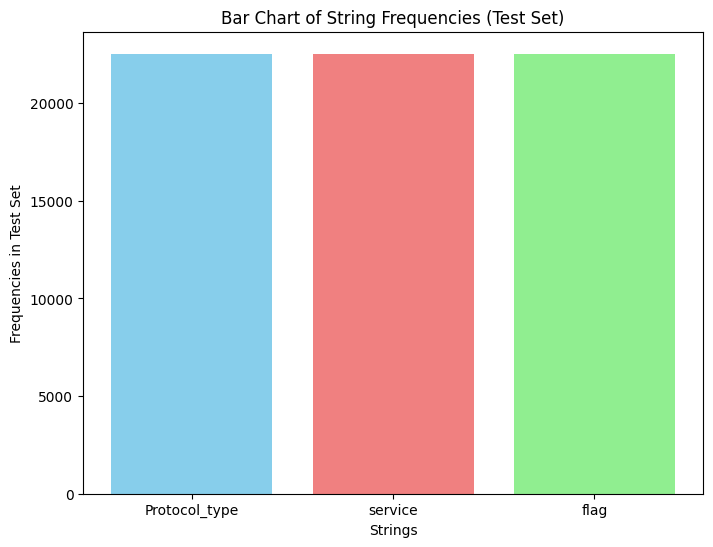

In [ ]:
# prompt: draw a bar chart to view the three strings (string1, string2 and string3) for the test set

# Sample data (replace with your actual string data)
string1 = "Protocol_type"
string2 = "service"
string3 = "flag"
string_data = [string1, string2, string3]

# Assuming you have frequency data for the test set
# Replace these with actual frequency values from your dataset
frequency_data_test = [df_test['protocol_type'].value_counts().sum(),
                       df_test['service'].value_counts().sum(),
                       df_test['flag'].value_counts().sum()]


# Create the bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.bar(string_data, frequency_data_test, color=['skyblue', 'lightcoral', 'lightgreen'])  # Customize colors
plt.xlabel("Strings")
plt.ylabel("Frequencies in Test Set")  # Or any other appropriate label
plt.title("Bar Chart of String Frequencies (Test Set)")
plt.show()

In [ ]:
#Transform categorical features into numbers using LabelEncoder()
df_categorical_values_enc=df_categorical_values.apply(LabelEncoder().fit_transform)
#print(df_categorical_values_enc.head())

In [ ]:
# test set
testdf_categorical_values_enc=testdf_categorical_values.apply(LabelEncoder().fit_transform)

In [ ]:
#One-Hot-Encoding
enc = OneHotEncoder()
df_categorical_values_encenc = enc.fit_transform(df_categorical_values_enc)
df_cat_data = pd.DataFrame(df_categorical_values_encenc.toarray(),columns=dumcols)

# test set
testdf_categorical_values_encenc = enc.fit_transform(testdf_categorical_values_enc)

# Define testdumcols before using it (this is the fix)
unique_service_test = sorted(df_test.service.unique())
string2 = 'service_'  # Make sure string2 is defined
unique_service2_test = [string2 + x for x in unique_service_test]
testdumcols = unique_protocol2 + unique_service2_test + unique_flag2

testdf_cat_data = pd.DataFrame(testdf_categorical_values_encenc.toarray(),columns=testdumcols)

In [ ]:
#Add 6 missing categories from train set to test set
trainservice=df['service'].tolist()
testservice= df_test['service'].tolist()
difference=list(set(trainservice) - set(testservice))
string = 'service_'
difference=[string + x for x in difference]

#print(diference)
for col in difference:
    testdf_cat_data[col] = 0
print(testdf_cat_data.shape)

(22544, 84)


In [ ]:
#Joining encoded categorical dataframe with the non-categorical dataframe
newdf=df.join(df_cat_data)
newdf.drop('flag', axis=1, inplace=True)
newdf.drop('protocol_type', axis=1, inplace=True)
newdf.drop('service', axis=1, inplace=True)

In [ ]:
# test data
newdf_test=df_test.join(testdf_cat_data)
newdf_test.drop('flag', axis=1, inplace=True)
newdf_test.drop('protocol_type', axis=1, inplace=True)
newdf_test.drop('service', axis=1, inplace=True)
print(newdf.shape)
print(newdf_test.shape)

(125973, 123)
(22544, 123)


In [ ]:
#Split Dataset into 4 datasets for every attack category
#Rename every attack label: 0=normal, 1=DoS, 2=Probe, 3=R2L and 4=U2R.
#Replace labels column with new labels column
#Make new datasets
labeldf=newdf['label']
labeldf_test=newdf_test['label']

In [ ]:
# change the label column
newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})

<ipython-input-31-4fe3d4ec6cef>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
<ipython-input-31-4fe3d4ec6cef>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm'

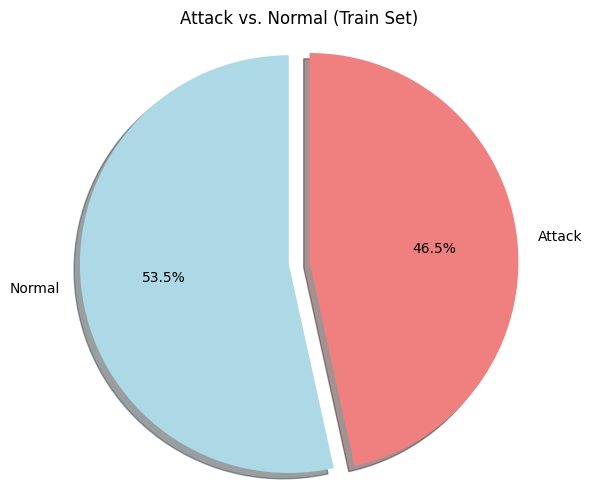

In [ ]:
# prompt: draw a pie chart to displayy the attacks vs normal in train set

# Calculate the counts of 'normal' and 'attack' labels
normal_count = (newlabeldf == 0).sum()
attack_count = (newlabeldf != 0).sum()

# Create the pie chart
labels = ['Normal', 'Attack']
sizes = [normal_count, attack_count]
colors = ['lightblue', 'lightcoral']  # Customize colors as needed
explode = (0.1, 0)  # Explode the 'Normal' slice

plt.figure(figsize=(6, 6))  # Adjust figure size as needed
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Attack vs. Normal (Train Set)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# put the new label column back
newdf['label'] = newlabeldf
newdf_test['label'] = newlabeldf_test

In [ ]:
to_drop_DoS = [2,3,4]
to_drop_Probe = [1,3,4]
to_drop_R2L = [1,2,4]
to_drop_U2R = [1,2,3]
DoS_df=newdf[~newdf['label'].isin(to_drop_DoS)]
Probe_df=newdf[~newdf['label'].isin(to_drop_Probe)]
R2L_df=newdf[~newdf['label'].isin(to_drop_R2L)]
U2R_df=newdf[~newdf['label'].isin(to_drop_U2R)]

In [ ]:
#test
DoS_df_test=newdf_test[~newdf_test['label'].isin(to_drop_DoS)]
Probe_df_test=newdf_test[~newdf_test['label'].isin(to_drop_Probe)]
R2L_df_test=newdf_test[~newdf_test['label'].isin(to_drop_R2L)]
U2R_df_test=newdf_test[~newdf_test['label'].isin(to_drop_U2R)]

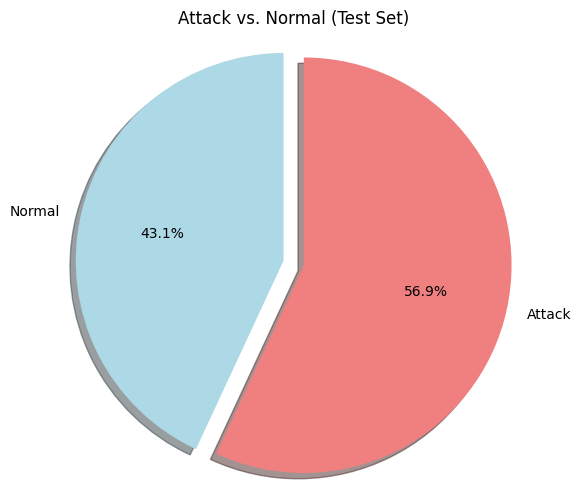

In [ ]:
# prompt: draw a pie chart to display all attacks vs normal in test set

# Calculate the counts of 'normal' and 'attack' labels in the test set
normal_count_test = (newlabeldf_test == 0).sum()
attack_count_test = (newlabeldf_test != 0).sum()

# Create the pie chart for the test set
labels_test = ['Normal', 'Attack']
sizes_test = [normal_count_test, attack_count_test]
colors_test = ['lightblue', 'lightcoral']  # Customize colors as needed
explode_test = (0.1, 0)  # Explode the 'Normal' slice

plt.figure(figsize=(6, 6))  # Adjust figure size as needed
plt.pie(sizes_test, explode=explode_test, labels=labels_test, colors=colors_test, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Attack vs. Normal (Test Set)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
#Step 4: Feature Scaling
# Split dataframes into X & Y
# assign X as a dataframe of feautures and Y as a series of outcome variables
X_DoS = DoS_df.drop('label',axis = 1)
X_Probe = Probe_df.drop('label',axis = 1)
X_R2L = R2L_df.drop('label',axis = 1)
X_U2R = U2R_df.drop('label',axis = 1)

# test set
X_DoS_test = DoS_df_test.drop('label',axis = 1)
X_Probe_test = Probe_df_test.drop('label',axis = 1)
X_R2L_test = R2L_df_test.drop('label',axis = 1)
X_U2R_test = U2R_df_test.drop('label',axis = 1)

In [ ]:
colNames=list(X_DoS)
colNames_test=list(X_DoS_test)

In [ ]:
#Use StandardScaler() to scale the dataframes
from sklearn import preprocessing

scaler1 = preprocessing.StandardScaler().fit(X_DoS)
scaler2 = preprocessing.StandardScaler().fit(X_Probe)
scaler3 = preprocessing.StandardScaler().fit(X_R2L)
scaler4 = preprocessing.StandardScaler().fit(X_U2R)

# test data
scaler5 = preprocessing.StandardScaler().fit(X_DoS_test)
scaler6 = preprocessing.StandardScaler().fit(X_Probe_test)
scaler7 = preprocessing.StandardScaler().fit(X_R2L_test)
scaler8 = preprocessing.StandardScaler().fit(X_U2R_test)


In [ ]:
print(X_DoS.std(axis=0))

duration            1009.209203
src_bytes         322480.380891
dst_bytes          50522.470481
land                   0.014855
wrong_fragment         0.267249
                      ...      
flag_S1                0.056520
flag_S2                0.033069
flag_S3                0.019928
flag_SF                0.489846
flag_SH                0.004202
Length: 122, dtype: float64


In [ ]:
X_Probe.std(axis=0);
X_R2L.std(axis=0);
X_U2R.std(axis=0);

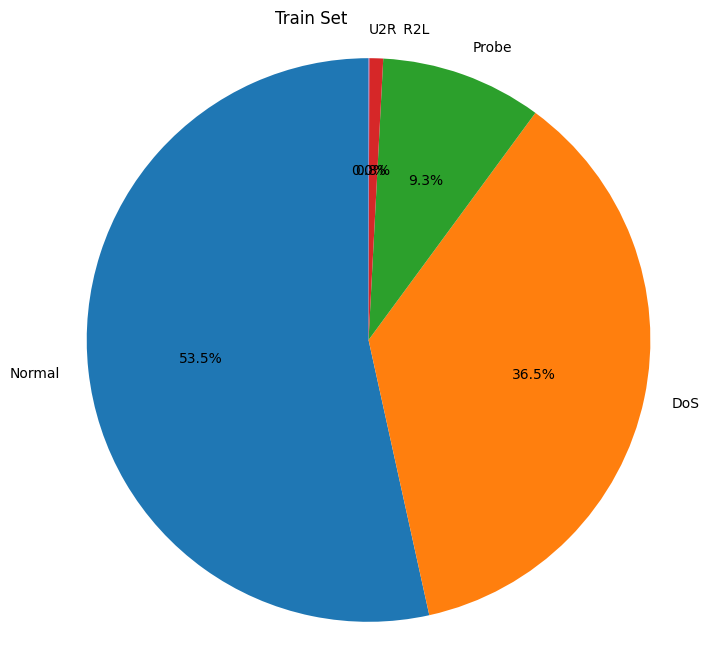

In [ ]:
# prompt: draw a piechart to display all attack types (normal, DoS, Probe, U2R and R2l) in the train set

import matplotlib.pyplot as plt

# Assuming 'newdf' is your DataFrame with the 'label' column
# containing the numerical attack labels (0, 1, 2, 3, 4)

attack_types = {
    0: 'Normal',
    1: 'DoS',
    2: 'Probe',
    3: '      R2L',
    4: 'U2R'
}

attack_counts = newdf['label'].value_counts()

labels = [attack_types[label] for label in attack_counts.index]
sizes = attack_counts.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Train Set                      ')
plt.show()

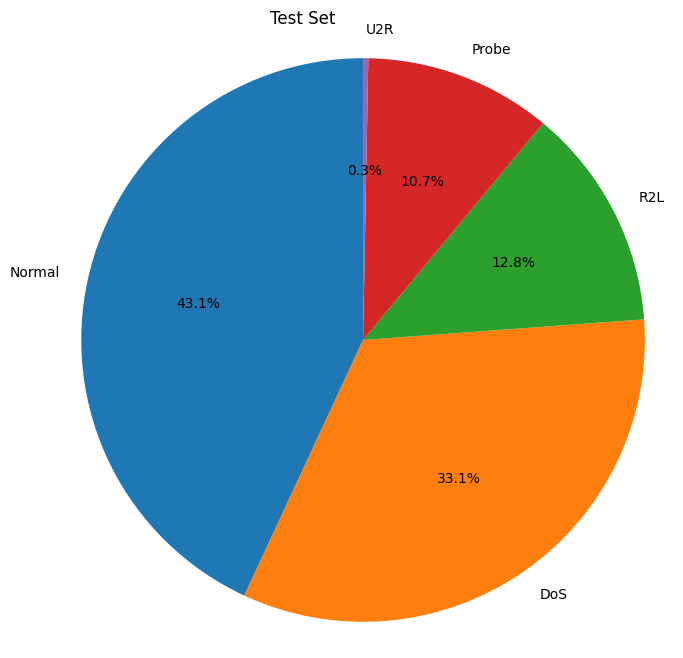

In [ ]:
# prompt: draw a pie chart to display the five attack types (normal, DoS, Probe, R2L and U2R)

# Assuming 'newdf_test' is your DataFrame with the 'label' column
# containing the numerical attack labels (0, 1, 2, 3, 4)

attack_types = {
    0: 'Normal',
    1: 'DoS',
    2: 'Probe',
    3: 'R2L',
    4: 'U2R'
}

attack_counts_test = newdf_test['label'].value_counts()

labels_test = [attack_types[label] for label in attack_counts_test.index]
sizes_test = attack_counts_test.values

plt.figure(figsize=(8, 8))
plt.pie(sizes_test, labels=labels_test, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Test Set                       ')
plt.show()

In [ ]:
#Feature Selection
from sklearn.feature_selection import SelectPercentile, f_classif
np.seterr(divide='ignore', invalid='ignore');
selector=SelectPercentile(f_classif, percentile=10)

# Define Y_DoS - it should contain the target variable for the DoS dataset
Y_DoS = DoS_df['label'] # Assuming 'label' column contains the target

X_newDoS = selector.fit_transform(X_DoS,Y_DoS)

#Get the features that were selected: DoS
true=selector.get_support()
newcolindex_DoS=[i for i, x in enumerate(true) if x]
newcolname_DoS=list( colNames[i] for i in newcolindex_DoS )


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 16  44  63  66  68  86 114] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


In [ ]:
true=selector.get_support()
newcolindex_DoS=[i for i, x in enumerate(true) if x]
newcolname_DoS=list( colNames[i] for i in newcolindex_DoS )
newcolname_DoS

['logged_in',
 'count',
 'serror_rate',
 'srv_serror_rate',
 'same_srv_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'service_http',
 'flag_S0',
 'flag_SF']

In [ ]:
#Feature Selection
from sklearn.feature_selection import SelectPercentile, f_classif
import numpy as np #Make sure numpy is imported

np.seterr(divide='ignore', invalid='ignore');
selector=SelectPercentile(f_classif, percentile=10)

# ... (other code) ...

# Define Y_Probe before using it
Y_Probe = Probe_df['label']  # Assuming 'label' column contains the target

# Now you can use Y_Probe
X_newProbe = selector.fit_transform(X_Probe,Y_Probe)
X_newProbe.shape

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 4 16] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


(78999, 13)

In [ ]:
# Define Y_Probe - it should contain the target variable for the Probe dataset
Y_Probe = Probe_df['label'] # Assuming 'label' column contains the target

X_newProbe = selector.fit_transform(X_Probe,Y_Probe)

#Get the features that were selected: Probe
true=selector.get_support()
newcolindex_Probe=[i for i, x in enumerate(true) if x]
newcolname_Probe=list( colNames[i] for i in newcolindex_Probe )

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 4 16] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


In [ ]:
true=selector.get_support()
newcolindex_Probe=[i for i, x in enumerate(true) if x]
newcolname_Probe=list( colNames[i] for i in newcolindex_Probe )
newcolname_Probe

['logged_in',
 'rerror_rate',
 'srv_rerror_rate',
 'dst_host_srv_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'Protocol_type_icmp',
 'service_eco_i',
 'service_private',
 'flag_SF']

In [ ]:
# Define Y_R2L - it should contain the target variable for the R2L dataset
Y_R2L = R2L_df['label'] # Assuming 'label' column contains the target

X_newR2L = selector.fit_transform(X_R2L,Y_R2L)

#Get the features that were selected: R2L
true=selector.get_support()
newcolindex_R2L=[i for i, x in enumerate(true) if x]
newcolname_R2L=list( colNames[i] for i in newcolindex_R2L )



/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [  4  16  43  44  46  47  48  49  50  51  54  57  58  62  63  64  66  67
  68  70  71  72  73  74  76  77  78  79  80  81  82  83  86  87  89  92
  93  96  98  99 100 107 108 109 110 114] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


In [ ]:
X_newR2L = selector.fit_transform(X_R2L,Y_R2L)
X_newR2L.shape

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [  4  16  43  44  46  47  48  49  50  51  54  57  58  62  63  64  66  67
  68  70  71  72  73  74  76  77  78  79  80  81  82  83  86  87  89  92
  93  96  98  99 100 107 108 109 110 114] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


(68338, 13)

In [ ]:
true=selector.get_support()
newcolindex_R2L=[i for i, x in enumerate(true) if x]
newcolname_R2L=list( colNames[i] for i in newcolindex_R2L)
newcolname_R2L

['src_bytes',
 'dst_bytes',
 'hot',
 'num_failed_logins',
 'is_guest_login',
 'dst_host_srv_count',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'service_ftp',
 'service_ftp_data',
 'service_http',
 'service_imap4',
 'flag_RSTO']

In [ ]:
# Define Y_U2R - it should contain the target variable for the U2R dataset
Y_U2R = U2R_df['label'] # Assuming 'label' column contains the target

X_newU2R = selector.fit_transform(X_U2R,Y_U2R)
X_newU2R.shape

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [  4  16  43  44  46  47  48  49  50  51  54  57  58  62  63  64  66  67
  68  70  71  72  73  74  75  76  77  78  79  80  81  82  83  86  87  89
  92  93  96  98  99 100 107 108 109 110 114] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


(67395, 13)

In [ ]:
true=selector.get_support()
newcolindex_U2R=[i for i, x in enumerate(true) if x]
newcolname_U2R=list( colNames[i] for i in newcolindex_U2R)
newcolname_U2R

['urgent',
 'hot',
 'root_shell',
 'num_file_creations',
 'num_shells',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'service_ftp_data',
 'service_http',
 'service_telnet']

In [ ]:
print('Features selected for DoS:',newcolname_DoS)
print()
print('Features selected for Probe:',newcolname_Probe)
print()
print('Features selected for R2L:',newcolname_R2L)
print()
print('Features selected for U2R:',newcolname_U2R)

Features selected for DoS: ['logged_in', 'count', 'serror_rate', 'srv_serror_rate', 'same_srv_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'service_http', 'flag_S0', 'flag_SF']

Features selected for Probe: ['logged_in', 'rerror_rate', 'srv_rerror_rate', 'dst_host_srv_count', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'Protocol_type_icmp', 'service_eco_i', 'service_private', 'flag_SF']

Features selected for R2L: ['src_bytes', 'dst_bytes', 'hot', 'num_failed_logins', 'is_guest_login', 'dst_host_srv_count', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'service_ftp', 'service_ftp_data', 'service_http', 'service_imap4', 'flag_RSTO']

Features selected for U2R: ['urgent', 'hot', 'root_shell', 'num_file_creations', 'num_shells', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_

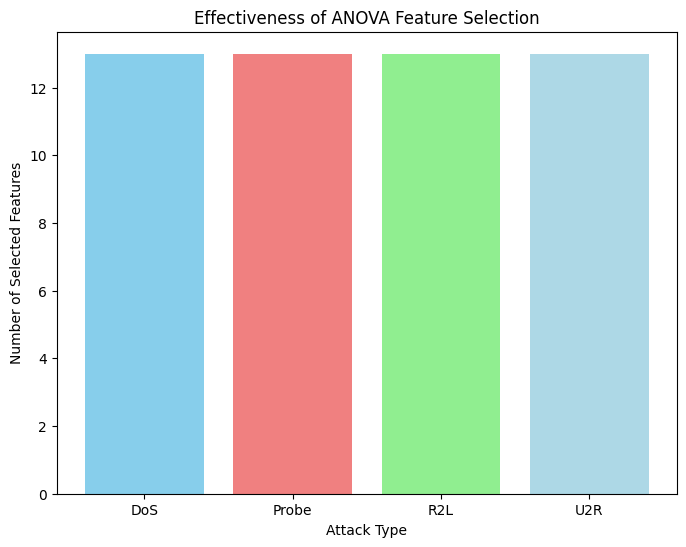

In [ ]:
# prompt: draw a graph to show effectiveness of ANOVA feature selection for the trained set
# contain the lists of selected features for each attack type.

# Sample data (replace with your actual feature selection results)
attack_types = ['DoS', 'Probe', 'R2L', 'U2R']
selected_features = [len(newcolname_DoS), len(newcolname_Probe), len(newcolname_R2L), len(newcolname_U2R)]

plt.figure(figsize=(8, 6))
plt.bar(attack_types, selected_features, color=['skyblue', 'lightcoral', 'lightgreen', 'lightblue'])
plt.xlabel("Attack Type")
plt.ylabel("Number of Selected Features")
plt.title("Effectiveness of ANOVA Feature Selection")
plt.show()

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# Create a decision tree classifier. By convention, clf means 'classifier'
clf = DecisionTreeClassifier(random_state=0)

#rank all features, i.e continue the elimination until the last one
rfe = RFE(clf, n_features_to_select=1)
rfe.fit(X_newDoS, Y_DoS.astype('int'))
print ("DoS Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_DoS)))

DoS Features sorted by their rank:
[(1, 'same_srv_rate'), (2, 'count'), (3, 'flag_SF'), (4, 'dst_host_serror_rate'), (5, 'dst_host_same_srv_rate'), (6, 'dst_host_srv_count'), (7, 'dst_host_count'), (8, 'logged_in'), (9, 'serror_rate'), (10, 'dst_host_srv_serror_rate'), (11, 'srv_serror_rate'), (12, 'service_http'), (13, 'flag_S0')]


In [ ]:
rfe.fit(X_newProbe, Y_Probe.astype(int))
print ("Probe Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_Probe)))

Probe Features sorted by their rank:
[(1, 'dst_host_same_src_port_rate'), (2, 'dst_host_srv_count'), (3, 'dst_host_rerror_rate'), (4, 'service_private'), (5, 'logged_in'), (6, 'dst_host_diff_srv_rate'), (7, 'dst_host_srv_diff_host_rate'), (8, 'flag_SF'), (9, 'service_eco_i'), (10, 'rerror_rate'), (11, 'Protocol_type_icmp'), (12, 'dst_host_srv_rerror_rate'), (13, 'srv_rerror_rate')]


In [ ]:
rfe.fit(X_newR2L, Y_R2L.astype(int))

print ("R2L Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_R2L)))

R2L Features sorted by their rank:
[(1, 'src_bytes'), (2, 'dst_bytes'), (3, 'hot'), (4, 'dst_host_srv_diff_host_rate'), (5, 'service_ftp_data'), (6, 'dst_host_same_src_port_rate'), (7, 'dst_host_srv_count'), (8, 'num_failed_logins'), (9, 'service_imap4'), (10, 'is_guest_login'), (11, 'service_ftp'), (12, 'flag_RSTO'), (13, 'service_http')]


In [ ]:
rfe.fit(X_newU2R, Y_U2R.astype(int))

print ("U2R Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_U2R)))

U2R Features sorted by their rank:
[(1, 'hot'), (2, 'dst_host_srv_count'), (3, 'dst_host_count'), (4, 'root_shell'), (5, 'num_shells'), (6, 'service_ftp_data'), (7, 'dst_host_srv_diff_host_rate'), (8, 'num_file_creations'), (9, 'dst_host_same_src_port_rate'), (10, 'service_telnet'), (11, 'srv_diff_host_rate'), (12, 'service_http'), (13, 'urgent')]


In [ ]:
from sklearn.feature_selection import RFE
clf = DecisionTreeClassifier(random_state=0)
rfe = RFE(estimator=clf, n_features_to_select=13, step=1)
rfe.fit(X_DoS, Y_DoS.astype(int))
X_rfeDoS=rfe.transform(X_DoS)
true=rfe.support_
rfecolindex_DoS=[i for i, x in enumerate(true) if x]
rfecolname_DoS=list(colNames[i] for i in rfecolindex_DoS)

In [ ]:
rfe.fit(X_Probe, Y_Probe.astype(int))
X_rfeProbe=rfe.transform(X_Probe)
true=rfe.support_
rfecolindex_Probe=[i for i, x in enumerate(true) if x]
rfecolname_Probe=list(colNames[i] for i in rfecolindex_Probe)

In [ ]:
rfe.fit(X_R2L, Y_R2L.astype(int))
X_rfeR2L=rfe.transform(X_R2L)
true=rfe.support_
rfecolindex_R2L=[i for i, x in enumerate(true) if x]
rfecolname_R2L=list(colNames[i] for i in rfecolindex_R2L)

In [ ]:
rfe.fit(X_U2R, Y_U2R.astype(int))
X_rfeU2R=rfe.transform(X_U2R)
true=rfe.support_
rfecolindex_U2R=[i for i, x in enumerate(true) if x]
rfecolname_U2R=list(colNames[i] for i in rfecolindex_U2R)

In [ ]:
print('Features selected for DoS:',rfecolname_DoS)
print()
print('Features selected for Probe:',rfecolname_Probe)
print()
print('Features selected for R2L:',rfecolname_R2L)
print()
print('Features selected for U2R:',rfecolname_U2R)

Features selected for DoS: ['src_bytes', 'dst_bytes', 'wrong_fragment', 'num_compromised', 'same_srv_rate', 'diff_srv_rate', 'dst_host_count', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'service_ecr_i', 'flag_RSTR', 'flag_S0']

Features selected for Probe: ['src_bytes', 'dst_bytes', 'rerror_rate', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_rerror_rate', 'service_finger', 'service_ftp_data', 'service_http', 'service_private', 'service_smtp', 'service_telnet']

Features selected for R2L: ['duration', 'src_bytes', 'dst_bytes', 'hot', 'num_failed_logins', 'num_access_files', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'service_ftp_data', 'service_imap4']

Features selected for U2R: ['duration', 'src_bytes', 'dst_bytes', 'hot', 'root_shell', 'num_file_creations', 'num_shells', 'srv_count', 'dst_host_count', 'dst_host_same_sr

In [ ]:
print(X_rfeDoS.shape)
print(X_rfeProbe.shape)
print(X_rfeR2L.shape)
print(X_rfeU2R.shape)

(113270, 13)
(78999, 13)
(68338, 13)
(67395, 13)


In [ ]:
# all features
clf_DoS=DecisionTreeClassifier(random_state=0)
clf_Probe=DecisionTreeClassifier(random_state=0)
clf_R2L=DecisionTreeClassifier(random_state=0)
clf_U2R=DecisionTreeClassifier(random_state=0)
clf_DoS.fit(X_DoS, Y_DoS.astype(int))
clf_Probe.fit(X_Probe, Y_Probe.astype(int))
clf_R2L.fit(X_R2L, Y_R2L.astype(int))
clf_U2R.fit(X_U2R, Y_U2R.astype(int))

DecisionTreeClassifier(random_state=0)

In [ ]:
# selected features
clf_rfeDoS=DecisionTreeClassifier(random_state=0)
clf_rfeProbe=DecisionTreeClassifier(random_state=0)
clf_rfeR2L=DecisionTreeClassifier(random_state=0)
clf_rfeU2R=DecisionTreeClassifier(random_state=0)
clf_rfeDoS.fit(X_rfeDoS, Y_DoS.astype(int))
clf_rfeProbe.fit(X_rfeProbe, Y_Probe.astype(int))
clf_rfeR2L.fit(X_rfeR2L, Y_R2L.astype(int))
clf_rfeU2R.fit(X_rfeU2R, Y_U2R.astype(int))

DecisionTreeClassifier(random_state=0)

In [ ]:
# Get the column names from the training data
training_columns = X_DoS.columns

# Ensure the test data has the same columns in the same order
X_DoS_test = X_DoS_test.reindex(columns=training_columns)

# Now you can predict using the reordered test data
clf_DoS.predict(X_DoS_test)

array([1, 1, 0, ..., 0, 1, 0])

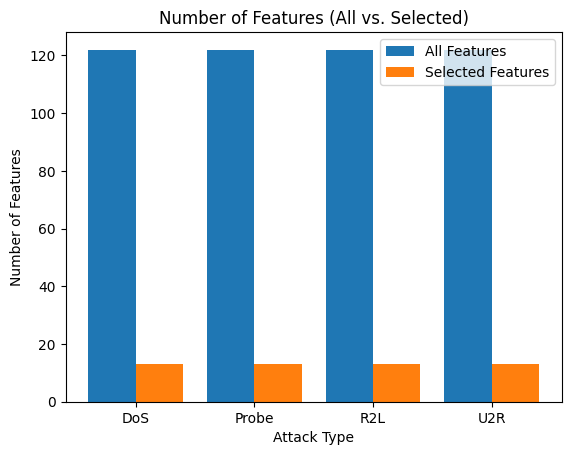

In [ ]:
# draw a barchart to display all 42 features vs  13 selected features in train set
# Assuming rfecolname_DoS, rfecolname_Probe, rfecolname_R2L, and rfecolname_U2R

attack_types = ['DoS', 'Probe', 'R2L', 'U2R']
all_features_count = len(X_DoS.columns) # Assuming all datasets have the same number of features
selected_features_count = [len(rfecolname_DoS), len(rfecolname_Probe), len(rfecolname_R2L), len(rfecolname_U2R)]


X_axis = np.arange(len(attack_types))

plt.bar(X_axis - 0.2, [all_features_count] * len(attack_types), 0.4, label='All Features')
plt.bar(X_axis + 0.2, selected_features_count, 0.4, label='Selected Features')

plt.xticks(X_axis, attack_types)
plt.xlabel("Attack Type")
plt.ylabel("Number of Features")
plt.title("Number of Features (All vs. Selected)")
plt.legend()
plt.show()

In [ ]:
# View the predicted probabilities of the first 10 observations
clf_DoS.predict_proba(X_DoS_test)[0:10]

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [ ]:
# Split the DoS test set into features (X_DoS_test) and labels (Y_DoS_test)
# Assuming 'label' column contains the target variable in DoS_df_test
Y_DoS_test = DoS_df_test['label']

# Now you can create the confusion matrix
Y_DoS_pred = clf_DoS.predict(X_DoS_test)
pd.crosstab(Y_DoS_test, Y_DoS_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,9508,203
1,1326,6134


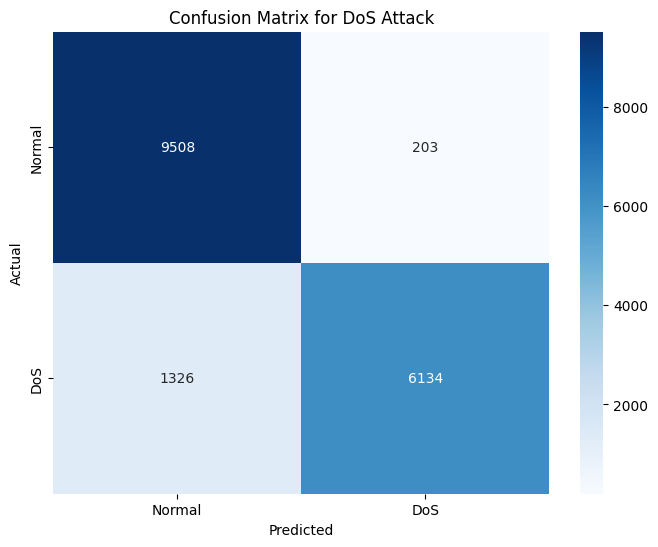

In [ ]:
# prompt: draw a graph to display confusion matrix results in DoS

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming Y_DoS_test and Y_DoS_pred are defined as in your original code
cm = confusion_matrix(Y_DoS_test, Y_DoS_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'DoS'], yticklabels=['Normal', 'DoS'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for DoS Attack')
plt.show()

In [ ]:
# Get the column names from the training data used to fit clf_Probe
training_columns_Probe = X_Probe.columns

# Ensure the Probe test data has the same columns in the same order
X_Probe_test = X_Probe_test.reindex(columns=training_columns_Probe)

# Extract the labels (target variable) from the Probe test set
Y_Probe_test = Probe_df_test['label'] # Assuming 'label' column contains the target

# Now you can predict using the reordered test data
Y_Probe_pred = clf_Probe.predict(X_Probe_test)
pd.crosstab(Y_Probe_test, Y_Probe_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,2
Actual attacks,,
0,9387,324
2,652,1769


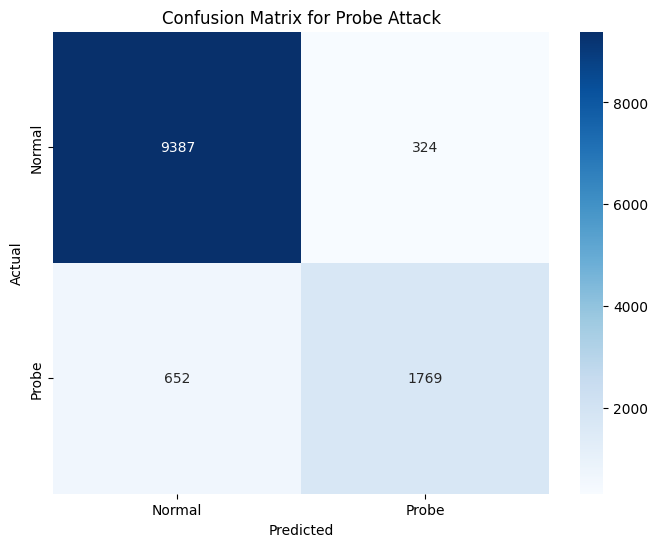

In [ ]:
# prompt: draw a graph to display confusion matrix results in Probe

# Assuming Y_Probe_test and Y_Probe_pred are defined as in your original code
cm = confusion_matrix(Y_Probe_test, Y_Probe_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Probe'], yticklabels=['Normal', 'Probe'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Probe Attack')
plt.show()

In [ ]:
# Get the column names from the training data used to fit clf_R2L
training_columns_R2L = X_R2L.columns

# Ensure the R2L test data has the same columns in the same order
X_R2L_test = X_R2L_test.reindex(columns=training_columns_R2L)

# Extract the labels (target variable) from the R2L test set
Y_R2L_test = R2L_df_test['label'] # Assuming 'label' column contains the target

# Now you can predict using the reordered test data
Y_R2L_pred = clf_R2L.predict(X_R2L_test)
pd.crosstab(Y_R2L_test, Y_R2L_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,3
Actual attacks,,
0,9708,3
3,2483,402


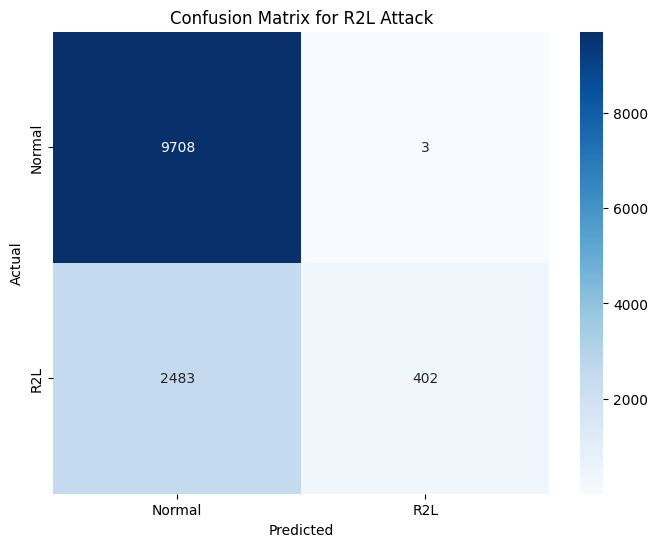

In [ ]:
# prompt: draw a graph to display confusion matrix results in R2L

# Assuming Y_R2L_test and Y_R2L_pred are defined as in your original code
cm = confusion_matrix(Y_R2L_test, Y_R2L_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'R2L'], yticklabels=['Normal', 'R2L'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for R2L Attack')
plt.show()

In [ ]:
# Get the column names from the training data used to fit clf_R2L
training_columns_U2R = X_U2R.columns

# Ensure the R2L test data has the same columns in the same order
X_U2R_test = X_U2R_test.reindex(columns=training_columns_U2R)

# Extract the labels (target variable) from the U2R test set
Y_U2R_test = U2R_df_test['label'] # Assuming 'label' column contains the target

# Now you can predict using the reordered test data
Y_U2R_pred = clf_U2R.predict(X_U2R_test)
pd.crosstab(Y_U2R_test, Y_U2R_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,4
Actual attacks,,
0,9707,4
4,51,16


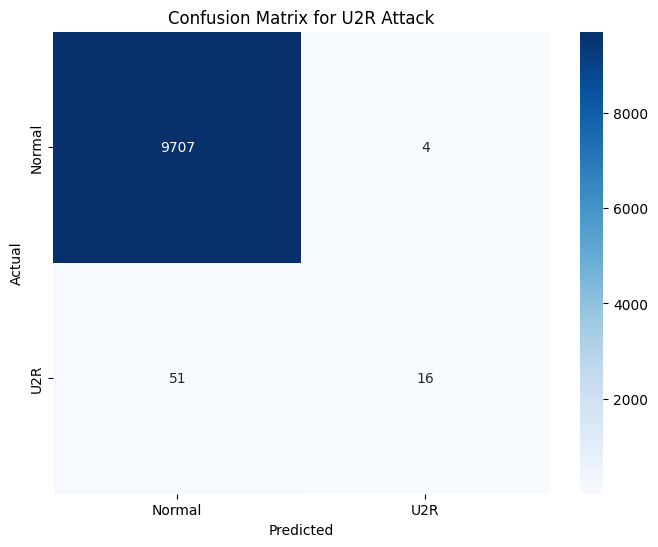

In [ ]:
# prompt: draw a graph to display confusion matrix results in u2r

# Assuming Y_U2R_test and Y_U2R_pred are defined as in your original code
cm = confusion_matrix(Y_U2R_test, Y_U2R_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'U2R'], yticklabels=['Normal', 'U2R'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for U2R Attack')
plt.show()

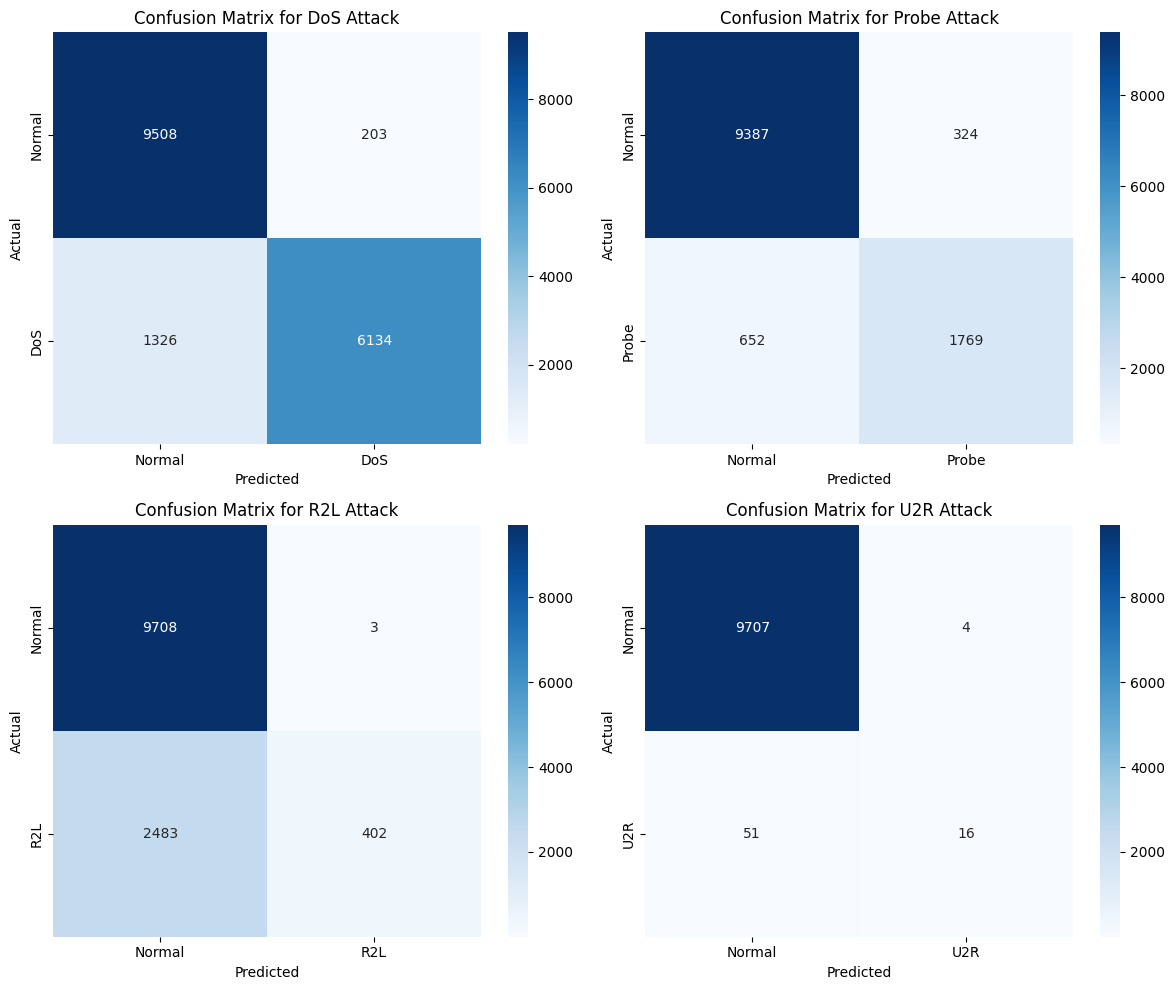

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming Y_DoS_test, Y_DoS_pred, Y_Probe_test, Y_Probe_pred, etc., are defined

attack_types = ['DoS', 'Probe', 'R2L', 'U2R']
y_tests = [Y_DoS_test, Y_Probe_test, Y_R2L_test, Y_U2R_test]
y_preds = [Y_DoS_pred, Y_Probe_pred, Y_R2L_pred, Y_U2R_pred]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, attack_type in enumerate(attack_types):
    cm = confusion_matrix(y_tests[i], y_preds[i])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=['Normal', attack_type], yticklabels=['Normal', attack_type])
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')
    axes[i].set_title(f'Confusion Matrix for {attack_type} Attack')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99633 (+/- 0.00383)
Precision: 0.99492 (+/- 0.00489)
Recall: 0.99665 (+/- 0.00540)
F-measure: 0.99578 (+/- 0.00440)


In [ ]:
accuracy = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99530 (+/- 0.00443)
Precision: 0.99245 (+/- 0.00886)
Recall: 0.99288 (+/- 0.00595)
F-measure: 0.99265 (+/- 0.00690)


In [ ]:
accuracy = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.97952 (+/- 0.01019)
Precision: 0.97219 (+/- 0.01730)
Recall: 0.96978 (+/- 0.01270)
F-measure: 0.97095 (+/- 0.01426)


In [ ]:
accuracy = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99744 (+/- 0.00229)
Precision: 0.90409 (+/- 0.12239)
Recall: 0.92423 (+/- 0.09849)
F-measure: 0.90979 (+/- 0.07475)


In [ ]:
print(__doc__)

import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
%matplotlib inline

Automatically created module for IPython interactive environment


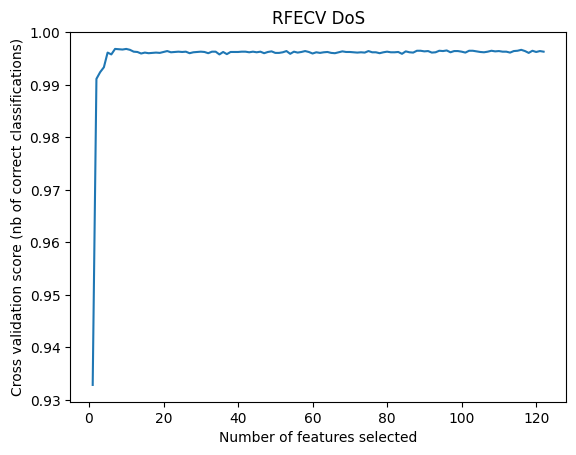

In [ ]:
rfecv_DoS = RFECV(estimator=clf_DoS, step=1, cv=10, scoring='accuracy')
rfecv_DoS.fit(X_DoS_test, Y_DoS_test)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.title('RFECV DoS')
# Access the mean test scores using cv_results_['mean_test_score']
plt.plot(range(1, len(rfecv_DoS.cv_results_['mean_test_score']) + 1), rfecv_DoS.cv_results_['mean_test_score'])
plt.show()

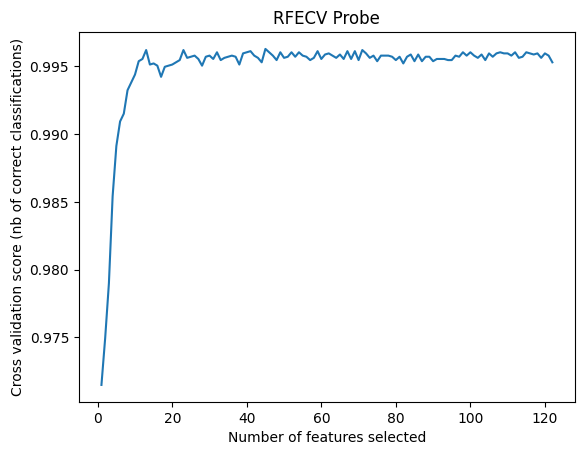

In [ ]:
rfecv_Probe = RFECV(estimator=clf_Probe, step=1, cv=10, scoring='accuracy')
rfecv_Probe.fit(X_Probe_test, Y_Probe_test)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.title('RFECV Probe')
# Access the mean test scores using cv_results_['mean_test_score']
plt.plot(range(1, len(rfecv_Probe.cv_results_['mean_test_score']) + 1), rfecv_Probe.cv_results_['mean_test_score'])
plt.show()

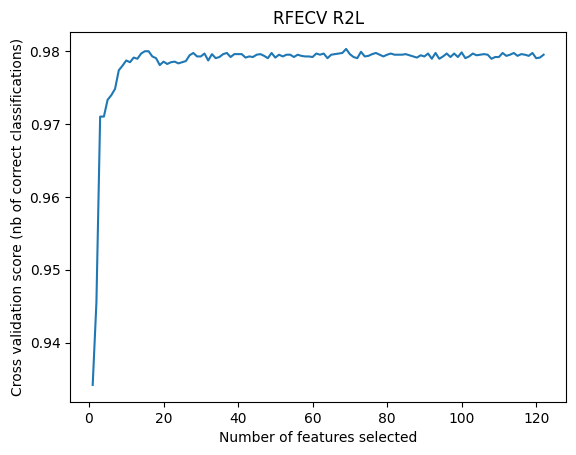

In [ ]:
rfecv_R2L = RFECV(estimator=clf_R2L, step=1, cv=10, scoring='accuracy')
rfecv_R2L.fit(X_R2L_test, Y_R2L_test)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.title('RFECV R2L')
# Access the mean test scores using cv_results_['mean_test_score']
plt.plot(range(1, len(rfecv_R2L.cv_results_['mean_test_score']) + 1), rfecv_R2L.cv_results_['mean_test_score'])
plt.show()

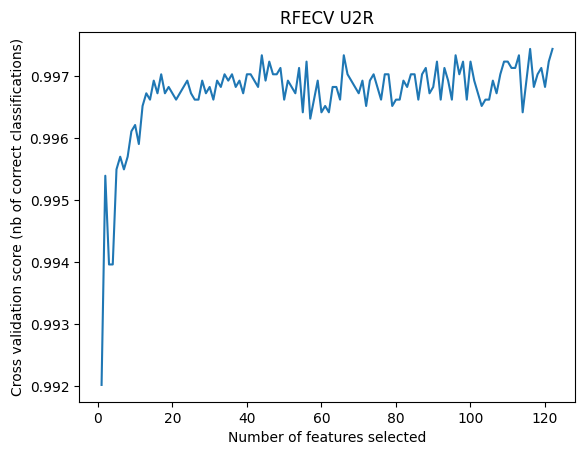

In [ ]:
rfecv_U2R = RFECV(estimator=clf_U2R, step=1, cv=10, scoring='accuracy')
rfecv_U2R.fit(X_U2R_test, Y_U2R_test)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.title('RFECV U2R')
# Access the mean test scores using cv_results_['mean_test_score']
plt.plot(range(1, len(rfecv_U2R.cv_results_['mean_test_score']) + 1), rfecv_U2R.cv_results_['mean_test_score'])
plt.show()

In [ ]:
# Retrain model with selected features
# Assuming 'clf_DoS' is the model you want to use (replace with the appropriate model if needed)
model = clf_DoS # Assign clf_DoS to the variable 'model'

# Select features from your training data (X_DoS) based on rfecolname_DoS
X_train_selected = X_DoS[rfecolname_DoS]
y_train = Y_DoS  # Assuming Y_DoS contains your training labels

# Similar for test data
X_test_selected = X_DoS_test[rfecolname_DoS] # Select the same features for your test data
y_test = Y_DoS_test  # Assuming Y_DoS_test contains your test labels


model.fit(X_train_selected, y_train)

# Evaluate performance
accuracy = model.score(X_test_selected, y_test)
print(f"Accuracy with selected features: {accuracy}")

Accuracy with selected features: 0.9477607594199522


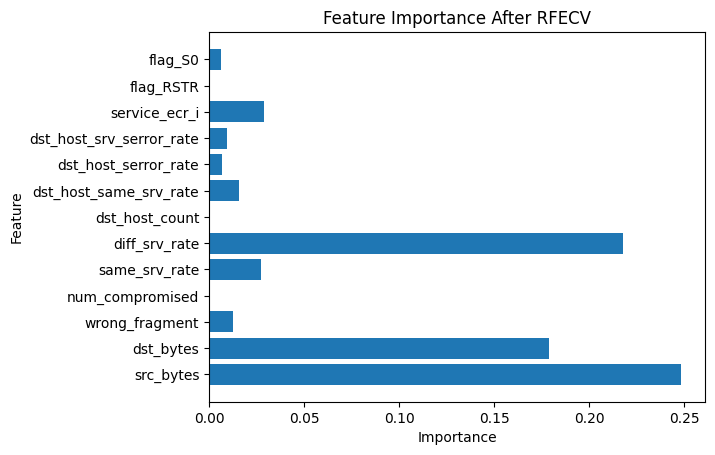

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Compute feature importances
perm_importance = permutation_importance(model, X_train_selected, y_train)

# Define selected_feature_names - This was missing
selected_feature_names = X_train_selected.columns # Assuming X_train_selected is a Pandas DataFrame

# Plot feature importance
plt.barh(range(len(perm_importance.importances_mean)), perm_importance.importances_mean)
plt.yticks(range(len(perm_importance.importances_mean)), selected_feature_names)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance After RFECV")
plt.show()

In [ ]:
# Assuming you want to access the grid scores of rfecv_DoS (replace with the desired one)
print("Grid Scores per number of features:", rfecv_DoS.cv_results_['mean_test_score'])

Grid Scores per number of features: [0.93285179 0.99114769 0.99242899 0.99336072 0.99615626 0.99580678
 0.99685515 0.99679687 0.99673863 0.99685501 0.99668036 0.99633095
 0.99627267 0.99598153 0.99615629 0.99603991 0.99609812 0.99615622
 0.99609801 0.9962727  0.99644739 0.9962145  0.9962727  0.99633095
 0.99627264 0.99633084 0.99603981 0.99621446 0.99627281 0.99633098
 0.99627267 0.99603977 0.99633088 0.99633101 0.99580694 0.99627274
 0.99586519 0.99627274 0.9962727  0.9962727  0.99633098 0.99633088
 0.99621446 0.99633091 0.9962145  0.99633098 0.99603981 0.9962727
 0.99638915 0.99609808 0.99609798 0.9962145  0.99644739 0.99592346
 0.99633098 0.99615632 0.9962727  0.99644739 0.9962727  0.99598153
 0.9962145  0.99609801 0.99621453 0.99627277 0.99609795 0.99603974
 0.9962146  0.99638919 0.9962726  0.9962727  0.99621446 0.99615629
 0.9962145  0.99615622 0.99644746 0.9962145  0.99621443 0.99603984
 0.9962145  0.99633101 0.9962145  0.99621453 0.99627277 0.99592343
 0.99638925 0.99621446 0.99

In [ ]:
# prompt: a code to test the model with the 13 selected features only

# Assuming X_DoS_test, X_Probe_test, X_R2L_test, X_U2R_test,
# Y_DoS_test, Y_Probe_test, Y_R2L_test, Y_U2R_test are defined as in your original code

# ... (previous code) ...

# Selected features for each attack type (replace with your actual selected feature names)
selected_features_DoS = rfecolname_DoS
selected_features_Probe = rfecolname_Probe
selected_features_R2L = rfecolname_R2L
selected_features_U2R = rfecolname_U2R

# Test the model with the 13 selected features

# DoS
X_DoS_test_selected = X_DoS_test[selected_features_DoS]
Y_DoS_pred_selected = clf_rfeDoS.predict(X_DoS_test_selected)
print("DoS - Confusion Matrix (Selected Features):")
print(pd.crosstab(Y_DoS_test, Y_DoS_pred_selected, rownames=['Actual attacks'], colnames=['Predicted attacks']))

# Probe
X_Probe_test_selected = X_Probe_test[selected_features_Probe]
Y_Probe_pred_selected = clf_rfeProbe.predict(X_Probe_test_selected)
print("\nProbe - Confusion Matrix (Selected Features):")
print(pd.crosstab(Y_Probe_test, Y_Probe_pred_selected, rownames=['Actual attacks'], colnames=['Predicted attacks']))

# R2L
X_R2L_test_selected = X_R2L_test[selected_features_R2L]
Y_R2L_pred_selected = clf_rfeR2L.predict(X_R2L_test_selected)
print("\nR2L - Confusion Matrix (Selected Features):")
print(pd.crosstab(Y_R2L_test, Y_R2L_pred_selected, rownames=['Actual attacks'], colnames=['Predicted attacks']))

# U2R
X_U2R_test_selected = X_U2R_test[selected_features_U2R]
Y_U2R_pred_selected = clf_rfeU2R.predict(X_U2R_test_selected)
print("\nU2R - Confusion Matrix (Selected Features):")
print(pd.crosstab(Y_U2R_test, Y_U2R_pred_selected, rownames=['Actual attacks'], colnames=['Predicted attacks']))


#Evaluate the model using selected features
accuracy = cross_val_score(clf_rfeDoS, X_DoS_test_selected, Y_DoS_test, cv=10, scoring='accuracy')
print("\nDoS Accuracy with Selected Features: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


accuracy = cross_val_score(clf_rfeProbe, X_Probe_test_selected, Y_Probe_test, cv=10, scoring='accuracy')
print("\nDoS Accuracy with Selected Features: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

accuracy = cross_val_score(clf_rfeR2L, X_R2L_test_selected, Y_R2L_test, cv=10, scoring='accuracy')
print("\nDoS Accuracy with Selected Features: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

accuracy = cross_val_score(clf_rfeU2R, X_U2R_test_selected, Y_U2R_test, cv=10, scoring='accuracy')
print("\nDoS Accuracy with Selected Features: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DoS - Confusion Matrix (Selected Features):
Predicted attacks     0     1
Actual attacks               
0                  9627    84
1                   813  6647

Probe - Confusion Matrix (Selected Features):
Predicted attacks     0     2
Actual attacks               
0                  8894   817
2                   841  1580

R2L - Confusion Matrix (Selected Features):
Predicted attacks     0    3
Actual attacks              
0                  9706    5
3                  2414  471

U2R - Confusion Matrix (Selected Features):
Predicted attacks     0   4
Actual attacks             
0                  9708   3
4                    39  28

DoS Accuracy with Selected Features: 0.99697 (+/- 0.00320)

DoS Accuracy with Selected Features: 0.99308 (+/- 0.00522)

DoS Accuracy with Selected Features: 0.97515 (+/- 0.00835)

DoS Accuracy with Selected Features: 0.99642 (+/- 0.00263)


In [ ]:
# prompt: cross validation to the 13 selected features

# Assuming X_DoS, Y_DoS, X_Probe, Y_Probe, X_R2L, Y_R2L, X_U2R, Y_U2R are already defined
# and the necessary libraries are imported.

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

# Define the classifier
clf = DecisionTreeClassifier(random_state=0)

# Perform cross-validation for each attack type

def perform_cross_validation(X, y, cv=10):
  """Performs 10-fold stratified cross-validation and prints evaluation metrics."""

  # Use StratifiedKFold for stratified sampling
  stratified_kfold = StratifiedKFold(n_splits=cv, shuffle=True, random_state=0)

  accuracy = cross_val_score(clf, X, y, cv=stratified_kfold, scoring='accuracy')
  precision = cross_val_score(clf, X, y, cv=stratified_kfold, scoring='precision_macro') #Use macro averaging for multiclass
  recall = cross_val_score(clf, X, y, cv=stratified_kfold, scoring='recall_macro')     #Use macro averaging for multiclass
  f1 = cross_val_score(clf, X, y, cv=stratified_kfold, scoring='f1_macro')           #Use macro averaging for multiclass

  print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
  print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
  print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
  print("F1-measure: %0.5f (+/- %0.5f)" % (f1.mean(), f1.std() * 2))

print("Cross-validation results for DoS:")
perform_cross_validation(X_DoS, Y_DoS)
print("\nCross-validation results for Probe:")
perform_cross_validation(X_Probe, Y_Probe)
print("\nCross-validation results for R2L:")
perform_cross_validation(X_R2L, Y_R2L)
print("\nCross-validation results for U2R:")
perform_cross_validation(X_U2R, Y_U2R)

Cross-validation results for DoS:
Accuracy: 0.99967 (+/- 0.00029)
Precision: 0.99965 (+/- 0.00031)
Recall: 0.99967 (+/- 0.00028)
F1-measure: 0.99966 (+/- 0.00030)

Cross-validation results for Probe:
Accuracy: 0.99908 (+/- 0.00042)
Precision: 0.99850 (+/- 0.00093)
Recall: 0.99783 (+/- 0.00126)
F1-measure: 0.99816 (+/- 0.00085)

Cross-validation results for R2L:
Accuracy: 0.99924 (+/- 0.00109)
Precision: 0.98632 (+/- 0.02964)
Recall: 0.98774 (+/- 0.01810)
F1-measure: 0.98687 (+/- 0.01839)

Cross-validation results for U2R:
Accuracy: 0.99945 (+/- 0.00044)
Precision: 0.84388 (+/- 0.23363)
Recall: 0.78489 (+/- 0.18166)
F1-measure: 0.80524 (+/- 0.17398)
